In [7]:
import sys
import os
import glob
import pickle
import pandas as pd
import numpy as np 

from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
import random


import multiprocessing as mp


import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
os.getcwd()

'/mnt/mnemo5/tao/PPI_Prediction_byCoevolution/notebooks'

In [5]:

%reload_ext autoreload
%autoreload 2

sys.path.append('../src/utilities/')


from pdb_benchmark import get_STRING1105_pdb_interact

from MSA_tools import downsample_msa
from MSA_tools import onePhylumRandomised_msa
from MSA_tools import allPhylumRandomised_msa
from MSA_tools import get_msa_statistics_dict
from MSA_tools import get_msa_dist_list

from collect_topCoEvos import get_maxBetValue_dict_pydcaFNAPC_array_npz


In [6]:
# "/mnt/mnemo6/tao/", /mnt/mnemo6/tao/notebook_data/
notebookData_folder = "/mnt/mnemo6/tao/"
newSTRING_rootFolder = f"{notebookData_folder}PPI_Coevolution/STRING_data_11.5/"
CoEvo_data_folder = f"{notebookData_folder}PPI_Coevolution/CoEvo_data_STRING11.5/"

# control experiments 

Regarding the clade-wise alignment method. I would like to see more in-depth analysis of the following issues
(1) Control of the effect of subdividing the msas by constructing pair alignments in which phylum-x submsa of protein 1 is merged with 
phylum-y submsa from protein 2. The perform of these control alignments where phylogenetic clades are mixed up should give a quantitative 
estimation of the effect of the method proposed. 

(2) Control of the effect of the classification method by pairing clade-msas for protein 1 with random versions of clade-msas for protein 2. 
Usually DCA methods assume for intra-molecular contacts that the protein has contacts and report some top pairs are real interactions. 
This method for inter-molecular interactions is expected to decide whether two proteins interact or not using a discrimination method. 
How does that work? These controls should inform about the false positive predicted interactions.

our solution : 

One side from one phyla, other side from one same  or all different phyla , but shuffled 








## get small and postive benchmark 

we use pdb_interact as benchmark 


In [4]:
pdb_interact_PPs, pdb_complex_PPs = get_STRING1105_pdb_interact(pdb_interact_filename="/mnt/mnemo6/damian/STRING_derived_v11.5/pdb/pdb_interact.tsv",
                                                                retrieve_spe=511145,)


pdb_interact_PPs_dict = {pp: 1 for pp in pdb_interact_PPs}
pdb_complex_PPs_dict = {pp: 1 for pp in pdb_complex_PPs}
pdb_PPs_dict = {pp: 1 for pp in pdb_interact_PPs+pdb_complex_PPs}

print(len(pdb_interact_PPs), len(pdb_complex_PPs), len(pdb_PPs_dict))


print(len(set(pdb_interact_PPs).intersection(pdb_complex_PPs)))

print(len(set(pdb_interact_PPs).union(pdb_complex_PPs)))

len of intersection: 309
414 3243 3657
0
3657


## control 1 


for phylum 1224 

In [21]:
# # run once to generate randomised paired MSA 
# Query_tuple = ('1224', '511145')
# EggNOG_maxLevel, currentSpe_TaxID = Query_tuple
# input_root_folder = CoEvo_data_folder+currentSpe_TaxID + \
#     "_EggNOGmaxLevel"+EggNOG_maxLevel+"_eggNOGfilteredData/"
# SamePosandNeg_pairedMSA_Nf90_folder = input_root_folder+"pair_MSA_Nf90_PasteAlign/"
# print(SamePosandNeg_pairedMSA_Nf90_folder)

# onePhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder = input_root_folder + \
#     "onePhylumRandomised_pair_MSA_Nf90_PasteAlign/"
# print(onePhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder)


# currentSpeMiddleDataPath = newSTRING_rootFolder+currentSpe_TaxID + \
#     "_EggNOGmaxLevel"+EggNOG_maxLevel+"_MiddleData/"
# print(currentSpeMiddleDataPath)
# with open(currentSpeMiddleDataPath+'fasta_protein_lens_dict.pickle', 'rb') as handle:
#     fasta_protein_lens = pickle.load(handle)

# print(fasta_protein_lens["511145.b0014"], fasta_protein_lens["511145.b0055"],
#       fasta_protein_lens["511145.b0095"], fasta_protein_lens["511145.b0436"])


# if not os.path.exists(onePhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder):
#     os.makedirs(onePhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder)
#     print(onePhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder)

# mp_args = [(pp1, pp2, fasta_protein_lens[pp1], SamePosandNeg_pairedMSA_Nf90_folder,
#             onePhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder) for pp1, pp2 in pdb_interact_PPs if pp1 in fasta_protein_lens]

# pool = mp.Pool(20)
# pool.map(onePhylumRandomised_msa, mp_args)
# pool.close()

### compuation 

for run DCA . 

use: 
 conda activate py37_pydca
 python onePhylumRandomised_DCA.py

In [5]:
# # run once to collect data,
# # move it here due to enviroment conflict, pandas is broken in py37_pydca
# Query_tuple = ('1224', '511145')
# EggNOG_maxLevel, currentSpe_TaxID = Query_tuple

# input_root_folder = CoEvo_data_folder+currentSpe_TaxID + \
#     "_EggNOGmaxLevel"+EggNOG_maxLevel+"_eggNOGfilteredData/"

# onePhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder = input_root_folder + \
#     "onePhylumRandomised_pair_MSA_Nf90_PasteAlign/"
# print(onePhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder)


# DCA_coevolutoin_path = input_root_folder + \
#     "onePhylumRandomised_coevolutoin_result_DCA/"


# Benchmark_folder = input_root_folder+"onePhylumRandomised_Benchmark/"


# currentSpeMiddleDataPath = newSTRING_rootFolder+currentSpe_TaxID + \
#     "_EggNOGmaxLevel"+EggNOG_maxLevel+"_MiddleData/"
# with open(currentSpeMiddleDataPath+'fasta_protein_lens_dict.pickle', 'rb') as handle:
#     fasta_protein_lens = pickle.load(handle)

# input_msaFiles = glob.glob(
#     onePhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder+"*.fasta")
# print(len(input_msaFiles))
# input_msaFiles = [os.path.basename(f)[0:-len(".fasta")]
#                   for f in input_msaFiles]
# input_PPs = [f.split("and") for f in input_msaFiles]


# ArgForGetDCAMax = [(p1, p2, fasta_protein_lens[p1], fasta_protein_lens[p2],
#                     DCA_coevolutoin_path) for p1, p2 in input_PPs]
# print("len(ArgForGetDCAMax):", len(ArgForGetDCAMax))

# if not os.path.exists(Benchmark_folder+"max_pydcaFNAPC_frame.csv"):
#     pool = mp.Pool(30)
#     max_pydcaFNAPC_list = pool.map(
#         get_maxBetValue_dict_pydcaFNAPC_array_npz, ArgForGetDCAMax)
#     pool.close()
#     max_pydcaFNAPC_frame = pd.DataFrame(max_pydcaFNAPC_list, columns=["currentSpe_pro1", "currentSpe_pro2",
#                                                                       "maxValue_all_idx_row", "maxValue_all_idx_col", "maxValue_all",
#                                                                       "maxValue_bet_idx_row", "maxValue_bet_idx_col", "maxValue_bet"])
#     max_pydcaFNAPC_frame.to_csv(
#         Benchmark_folder+"max_pydcaFNAPC_frame.csv", header=True, index=None, sep="\t")

/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/onePhylumRandomised_pair_MSA_Nf90_PasteAlign/
295
len(ArgForGetDCAMax): 295


### collection resutls and compare 

In [61]:
# get original reusults in this phylum


original_topRanking_DCA_frame = pd.read_csv(f"{CoEvo_data_folder}allPPI_511145_EggNOGmaxLevel1224_eggNOGfilteredData/AllPPI_Benchmark/"+"DCA_thres_0_topRanking_pydcaFNAPC_frame.csv",
                                            header=0, index_col=None, sep="\t")
print(original_topRanking_DCA_frame.shape)
original_topRanking_DCA_frame.head(n=3)

original_topRanking_DCA_dict = {
    (l[0], l[1]): l[2] for l in original_topRanking_DCA_frame.values.tolist()}

(2269191, 152)


In [62]:
leftPhylum_tuple = ('1224', '511145')
leftPhylum_EggNOG_maxLevel, leftPhylum_currentSpe_TaxID = leftPhylum_tuple
leftPhylum_input_root_folder = CoEvo_data_folder+leftPhylum_currentSpe_TaxID + \
    "_EggNOGmaxLevel"+leftPhylum_EggNOG_maxLevel+"_eggNOGfilteredData/"
leftPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder = leftPhylum_input_root_folder + \
    "onePhylumRandomised_pair_MSA_Nf90_PasteAlign/"
print(leftPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder)

/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/onePhylumRandomised_pair_MSA_Nf90_PasteAlign/


In [63]:
leftPhylum_input_msaFiles = glob.glob(
    leftPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder+"*.fasta")
print(len(leftPhylum_input_msaFiles))
leftPhylum_input_msaFiles = [os.path.basename(f)[0:-len(".fasta")]
                  for f in leftPhylum_input_msaFiles]
leftPhylum_input_PPs = [f.split("and") for f in leftPhylum_input_msaFiles]

295


In [64]:
control1_original_topRanking_DCA_dict = {(p1, p2): original_topRanking_DCA_dict[(
    p1, p2)] for p1, p2 in leftPhylum_input_PPs if (p1, p2) in original_topRanking_DCA_dict}
print(len(control1_original_topRanking_DCA_dict))
# one exceptin is ('511145.b0440', '511145.b4000'), probably removed by other filtering step, like deep homologs , no bigie
# from STRING_benchmark import get_STRING1105_physical_interact
# strPhy_dict = get_STRING1105_physical_interact(data_folder="/mnt/mnemo6/tao/notebook_data/STRING_derived_v11.5/download_files/protein.physical.links.v11.5/",
#                                 retrieve_spe=511145,
#                                      combined_score_thres=500,
#                                      inputFrameIsReversed=True,
#                                      return_dict=True,
#                                     )

294


In [65]:
control1_dataframe_file = leftPhylum_input_root_folder + \
    "onePhylumRandomised_Benchmark/max_pydcaFNAPC_frame.csv"
control1_dataframe = pd.read_csv(
    control1_dataframe_file, header=0, index_col=None, sep="\t")

control1_topRanking_DCA_dict = control1_dataframe.values.tolist()

control1_topRanking_DCA_dict = {(l[0],l[1]):l[-1] for l in control1_topRanking_DCA_dict}
print(len(control1_topRanking_DCA_dict))

295


In [35]:
# original_list = list()
# control1_list = list()
# for pp in control1_original_topRanking_DCA_dict:
#     # print(pp, control1_original_topRanking_DCA_dict[pp], control1_topRanking_DCA_dict[pp])
#     original_list.append(control1_original_topRanking_DCA_dict[pp])
#     control1_list.append(control1_topRanking_DCA_dict[pp])

# plt.hist(control1_list, bins=30, alpha=0.5, label="control1")
# plt.hist(original_list, bins=30, alpha=0.5, label="original value")
# plt.legend(loc='upper right')
# plt.show()

# # could plot all the two control on the same plot ?

## control 2

In [22]:
# # run once to get randomised paired MSA data 
# leftPhylum_tuple = ('1224', '511145')

# leftPhylum_EggNOG_maxLevel, leftPhylum_currentSpe_TaxID = leftPhylum_tuple
# leftPhylum_input_root_folder = CoEvo_data_folder+leftPhylum_currentSpe_TaxID + \
#     "_EggNOGmaxLevel"+leftPhylum_EggNOG_maxLevel+"_eggNOGfilteredData/"
# leftPhylum_pairedMSA_Nf90_folder = leftPhylum_input_root_folder + \
#     "pair_MSA_Nf90_PasteAlign/"
# print(leftPhylum_pairedMSA_Nf90_folder)


# leftPhylum_currentSpeMiddleDataPath = newSTRING_rootFolder+leftPhylum_currentSpe_TaxID + \
#     "_EggNOGmaxLevel"+leftPhylum_EggNOG_maxLevel+"_MiddleData/"
# print(leftPhylum_currentSpeMiddleDataPath)
# with open(leftPhylum_currentSpeMiddleDataPath+'fasta_protein_lens_dict.pickle', 'rb') as handle:
#     leftPhylum_fasta_protein_lens = pickle.load(handle)

# print(leftPhylum_fasta_protein_lens["511145.b0014"], leftPhylum_fasta_protein_lens["511145.b0055"],
#       leftPhylum_fasta_protein_lens["511145.b0095"], leftPhylum_fasta_protein_lens["511145.b0436"])

# allPhylum_tuple = ('2', '511145')

# allPhylum_EggNOG_maxLevel, allPhylum_currentSpe_TaxID = allPhylum_tuple
# allPhylum_input_root_folder = CoEvo_data_folder+allPhylum_currentSpe_TaxID + \
#     "_EggNOGmaxLevel"+allPhylum_EggNOG_maxLevel+"_eggNOGfilteredData/"
# allPhylum_pairedMSA_Nf90_folder = allPhylum_input_root_folder + \
#     "pair_MSA_Nf90_PasteAlign/"
# print(allPhylum_pairedMSA_Nf90_folder)


# allPhylum_currentSpeMiddleDataPath = newSTRING_rootFolder+allPhylum_currentSpe_TaxID + \
#     "_EggNOGmaxLevel"+allPhylum_EggNOG_maxLevel+"_MiddleData/"
# print(allPhylum_currentSpeMiddleDataPath)
# with open(allPhylum_currentSpeMiddleDataPath+'fasta_protein_lens_dict.pickle', 'rb') as handle:
#     allPhylum_fasta_protein_lens = pickle.load(handle)

# print(allPhylum_fasta_protein_lens["511145.b0014"], allPhylum_fasta_protein_lens["511145.b0055"],
#       allPhylum_fasta_protein_lens["511145.b0095"], allPhylum_fasta_protein_lens["511145.b0436"])


# allPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder = leftPhylum_input_root_folder + \
#     "allPhylumRandomised_pair_MSA_Nf90_PasteAlign/"
# print(allPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder)

# if not os.path.exists(allPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder):
#     os.makedirs(allPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder)
#     print(allPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder)


# mp_args = [(pp1, pp2, leftPhylum_fasta_protein_lens[pp1], allPhylum_fasta_protein_lens[pp1], leftPhylum_pairedMSA_Nf90_folder, allPhylum_pairedMSA_Nf90_folder,
#             allPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder) for pp1, pp2 in pdb_interact_PPs if (pp1 in leftPhylum_fasta_protein_lens) and (pp1 in allPhylum_fasta_protein_lens)]
# print(len(mp_args))
# pool = mp.Pool(20)
# pool.map(allPhylumRandomised_msa, mp_args)
# pool.close()

### computation 

for run DCA . 

use: 
 conda  activate py37_pydca
 python allPhylumRandomised_DCA.py

In [ ]:
# # # run once to collect data,
# # # move it here due to enviroment conflict, pandas is broken in py37_pydcab


# leftPhylum_tuple = ('1224', '511145')
# leftPhylum_EggNOG_maxLevel, leftPhylum_currentSpe_TaxID = leftPhylum_tuple
# leftPhylum_input_root_folder = CoEvo_data_folder+leftPhylum_currentSpe_TaxID + \
#     "_EggNOGmaxLevel"+leftPhylum_EggNOG_maxLevel+"_eggNOGfilteredData/"
# leftPhylum_currentSpeMiddleDataPath = newSTRING_rootFolder+leftPhylum_currentSpe_TaxID + \
#     "_EggNOGmaxLevel"+leftPhylum_EggNOG_maxLevel+"_MiddleData/"
# print(leftPhylum_currentSpeMiddleDataPath)
# with open(leftPhylum_currentSpeMiddleDataPath+'fasta_protein_lens_dict.pickle', 'rb') as handle:
#     leftPhylum_fasta_protein_lens = pickle.load(handle)


# allPhylum_tuple = ('2', '511145')

# allPhylum_EggNOG_maxLevel, allPhylum_currentSpe_TaxID = allPhylum_tuple
# allPhylum_input_root_folder = CoEvo_data_folder+allPhylum_currentSpe_TaxID + \
#     "_EggNOGmaxLevel"+allPhylum_EggNOG_maxLevel+"_eggNOGfilteredData/"
# allPhylum_currentSpeMiddleDataPath = newSTRING_rootFolder+allPhylum_currentSpe_TaxID + \
#     "_EggNOGmaxLevel"+allPhylum_EggNOG_maxLevel+"_MiddleData/"
# print(allPhylum_currentSpeMiddleDataPath)
# with open(allPhylum_currentSpeMiddleDataPath+'fasta_protein_lens_dict.pickle', 'rb') as handle:
#     allPhylum_fasta_protein_lens = pickle.load(handle)

# allPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder = leftPhylum_input_root_folder + \
#     "allPhylumRandomised_pair_MSA_Nf90_PasteAlign/"
# print(allPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder)

# DCA_coevolutoin_path = leftPhylum_input_root_folder + \
#     "allPhylumRandomised_coevolutoin_result_DCA/"
# MI_coevolutoin_path = leftPhylum_input_root_folder + \
#     "allPhylumRandomised_coevolutoin_result_MI/"

# Benchmark_folder = leftPhylum_input_root_folder+"allPhylumRandomised_Benchmark/"


# input_msaFiles = glob.glob(
#     allPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder+"*.fasta")
# print(len(input_msaFiles))
# input_msaFiles = [os.path.basename(f)[0:-len(".fasta")]
#                   for f in input_msaFiles]
# input_PPs = [f.split("and") for f in input_msaFiles]

# ArgForGetDCAMax = [(p1, p2, leftPhylum_fasta_protein_lens[p1], allPhylum_fasta_protein_lens[p2],
#                     DCA_coevolutoin_path) for p1, p2 in input_PPs]
# print("len(ArgForGetDCAMax):", len(ArgForGetDCAMax))

# if not os.path.exists(Benchmark_folder+"max_pydcaFNAPC_frame.csv"):
#     pool = mp.Pool(30)
#     max_pydcaFNAPC_list = pool.map(
#         get_maxBetValue_dict_pydcaFNAPC_array_npz, ArgForGetDCAMax)
#     pool.close()
#     max_pydcaFNAPC_frame = pd.DataFrame(max_pydcaFNAPC_list, columns=["currentSpe_pro1", "currentSpe_pro2",
#                                                                       "maxValue_all_idx_row", "maxValue_all_idx_col", "maxValue_all",
#                                                                       "maxValue_bet_idx_row", "maxValue_bet_idx_col", "maxValue_bet"])
#     max_pydcaFNAPC_frame.to_csv(
#         Benchmark_folder+"max_pydcaFNAPC_frame.csv", header=True, index=None, sep="\t")

/mnt/mnemo6/tao/PPI_Coevolution/STRING_data_11.5/511145_EggNOGmaxLevel1224_MiddleData/
/mnt/mnemo6/tao/PPI_Coevolution/STRING_data_11.5/511145_EggNOGmaxLevel2_MiddleData/
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/allPhylumRandomised_pair_MSA_Nf90_PasteAlign/


### collection resutls and compare

In [66]:
leftPhylum_tuple = ('1224', '511145')
leftPhylum_EggNOG_maxLevel, leftPhylum_currentSpe_TaxID = leftPhylum_tuple
leftPhylum_input_root_folder = CoEvo_data_folder+leftPhylum_currentSpe_TaxID + \
    "_EggNOGmaxLevel"+leftPhylum_EggNOG_maxLevel+"_eggNOGfilteredData/"
leftPhylum_currentSpeMiddleDataPath = newSTRING_rootFolder+leftPhylum_currentSpe_TaxID + \
    "_EggNOGmaxLevel"+leftPhylum_EggNOG_maxLevel+"_MiddleData/"
print(leftPhylum_currentSpeMiddleDataPath)
with open(leftPhylum_currentSpeMiddleDataPath+'fasta_protein_lens_dict.pickle', 'rb') as handle:
    leftPhylum_fasta_protein_lens = pickle.load(handle)


allPhylum_tuple = ('2', '511145')
allPhylum_EggNOG_maxLevel, allPhylum_currentSpe_TaxID = allPhylum_tuple
# allPhylum_input_root_folder = CoEvo_data_folder+allPhylum_currentSpe_TaxID + \
#     "_EggNOGmaxLevel"+allPhylum_EggNOG_maxLevel+"_eggNOGfilteredData/"
allPhylum_currentSpeMiddleDataPath = newSTRING_rootFolder+allPhylum_currentSpe_TaxID + \
    "_EggNOGmaxLevel"+allPhylum_EggNOG_maxLevel+"_MiddleData/"
print(allPhylum_currentSpeMiddleDataPath)
with open(allPhylum_currentSpeMiddleDataPath+'fasta_protein_lens_dict.pickle', 'rb') as handle:
    allPhylum_fasta_protein_lens = pickle.load(handle)

allPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder = leftPhylum_input_root_folder + \
    "allPhylumRandomised_pair_MSA_Nf90_PasteAlign/"
print(allPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder)

/mnt/mnemo6/tao/PPI_Coevolution/STRING_data_11.5/511145_EggNOGmaxLevel1224_MiddleData/
/mnt/mnemo6/tao/PPI_Coevolution/STRING_data_11.5/511145_EggNOGmaxLevel2_MiddleData/
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/allPhylumRandomised_pair_MSA_Nf90_PasteAlign/


In [67]:
allPhylum_input_msaFiles = glob.glob(
    allPhylumRandomised_SamePosandNeg_pairedMSA_Nf90_folder+"*.fasta")
print(len(allPhylum_input_msaFiles))
allPhylum_input_msaFiles = [os.path.basename(f)[0:-len(".fasta")]
                             for f in allPhylum_input_msaFiles]
allPhylum_input_PPs = [f.split("and") for f in allPhylum_input_msaFiles]

287


In [68]:
control2_original_topRanking_DCA_dict = {(p1, p2): original_topRanking_DCA_dict[(
    p1, p2)] for p1, p2 in allPhylum_input_PPs if (p1, p2) in original_topRanking_DCA_dict}
print(len(control2_original_topRanking_DCA_dict))

# one exceptin is ('511145.b0440', '511145.b4000'), probably removed by other filtering step, like deep homologs , no bigie

286


In [69]:
control2_dataframe_file = leftPhylum_input_root_folder + \
    "allPhylumRandomised_Benchmark/max_pydcaFNAPC_frame.csv"
control2_dataframe = pd.read_csv(control2_dataframe_file, header=0, index_col=None, sep="\t")
print(control2_dataframe.shape)
control2_topRanking_DCA_dict = control2_dataframe.values.tolist()

control2_topRanking_DCA_dict={(l[0],l[1]):l[-1] for l in control2_topRanking_DCA_dict}

(287, 8)


In [36]:
# original_list=list()
# control2_list=list()
# for pp in control2_original_topRanking_DCA_dict: 
#     #print(pp, control1_original_topRanking_DCA_dict[pp], control1_topRanking_DCA_dict[pp])
#     original_list.append(control2_original_topRanking_DCA_dict[pp])
#     control2_list.append(control2_topRanking_DCA_dict[pp])
# plt.hist(control1_list, bins=30, alpha=0.5, label="control1")
# plt.hist(original_list, bins=30, alpha=0.5, label="original value")
# plt.legend(loc='upper right')
# plt.show()

# # could plot all the two control on the same plot ?

# put two control in same plot 

In [70]:
print(len(control1_original_topRanking_DCA_dict),len(control2_original_topRanking_DCA_dict))
common_PPs=[pp for pp in control1_original_topRanking_DCA_dict if pp in control2_original_topRanking_DCA_dict]
print(len(common_PPs))

294 286
286


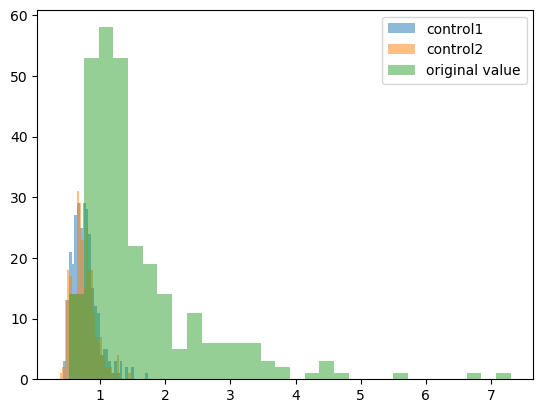

In [71]:
original_list=list()
control1_list = list()
control2_list=list()
for pp in common_PPs:
    #print(pp, control1_original_topRanking_DCA_dict[pp], control1_topRanking_DCA_dict[pp])
    original_list.append(control2_original_topRanking_DCA_dict[pp])
    control1_list.append(control1_topRanking_DCA_dict[pp])
    control2_list.append(control2_topRanking_DCA_dict[pp])

bins_num=30 # 30
plt.hist(control1_list, bins=bins_num, alpha=0.5, label="control1")
plt.hist(control2_list, bins=bins_num, alpha=0.5, label="control2")
plt.hist(original_list, bins=bins_num, alpha=0.5, label="original value")
plt.legend(loc='upper right')
plt.show()

# comment :  pair-wise similarity distribution  of certain protein family 
For different representative protein family, do a protein sim distribution plot for different phylunm and downsampled size  
Do distribgution , for other idea, mention them , (guided downsampl )


first filter protein by their exsitences in different phylum , and in comman benchmark and of course has the final pairedMSA 

could first pick up one randome pps to write the follwoing pipeline .. 

for this one , we dont have to choose posive and dont have to be from pdb ?

In [8]:
pdb_interact_PPs, pdb_complex_PPs = get_STRING1105_pdb_interact(pdb_interact_filename="/mnt/mnemo6/damian/STRING_derived_v11.5/pdb/pdb_interact.tsv",
                                                                retrieve_spe=511145,)


pdb_interact_PPs_dict = {pp: 1 for pp in pdb_interact_PPs}
pdb_complex_PPs_dict = {pp: 1 for pp in pdb_complex_PPs}
pdb_PPs_dict = {pp: 1 for pp in pdb_interact_PPs+pdb_complex_PPs}

print(len(pdb_interact_PPs), len(pdb_complex_PPs), len(pdb_PPs_dict))


print(len(set(pdb_interact_PPs).intersection(pdb_complex_PPs)))

print(len(set(pdb_interact_PPs).union(pdb_complex_PPs)))

len of intersection: 309
414 3243 3657
0
3657


In [9]:
EggNOG_maxLevel, currentSpe_TaxID = Query_tuple = ('1224', '511145')

SamePosandNeg_Benchmark=CoEvo_data_folder+"AllLevel_testPhylaEffectSamePosandNeg_Benchmark/"

SamePosandNeg_frame=pd.read_csv(SamePosandNeg_Benchmark+"SamePosandNeg_STRING115EggNog"+EggNOG_maxLevel+"Spe"+currentSpe_TaxID+".benchmark",
                                                                                                            header=0,index_col=None,sep="\t")
SamePosandNeg_PPs_dict = SamePosandNeg_frame.values.tolist()
SamePosandNeg_PPs_dict={(l[0],l[1]):1 for l in SamePosandNeg_PPs_dict}

In [10]:
pos_SamePosandNeg_frame = SamePosandNeg_frame.loc[SamePosandNeg_frame["benchmark_status"]=="P", :]
print(pos_SamePosandNeg_frame.shape)

pos_SamePosandNeg_PPs_dict = pos_SamePosandNeg_frame.values.tolist()
pos_SamePosandNeg_PPs_dict = {(l[0], l[1]): 1 for l in pos_SamePosandNeg_PPs_dict}

(3420, 9)


In [11]:
# selected_PPs=[pp for pp in pdb_interact_PPs if pp in SamePosandNeg_PPs_dict]
# if here is use pdb_interact_PPs, than later there is pp that have recored in different phylum 
# even use the one from allPPI benmark ?
selected_PPs = [pp for pp in pdb_interact_PPs if pp in SamePosandNeg_PPs_dict]
#selected_PPs = [pp for pp in pos_SamePosandNeg_PPs_dict.keys()]
print(len(selected_PPs))

print(selected_PPs[0:10])

154
[('511145.b0014', '511145.b2614'), ('511145.b0093', '511145.b2748'), ('511145.b0095', '511145.b2412'), ('511145.b0098', '511145.b3312'), ('511145.b0098', '511145.b3318'), ('511145.b0114', '511145.b0115'), ('511145.b0169', '511145.b3303'), ('511145.b0169', '511145.b3306'), ('511145.b0169', '511145.b3314'), ('511145.b0169', '511145.b3649')]


In [12]:
DownSample_strategy = "num"#"percent"
DownSample_sizes=[3,10,50,100,300]
pairedMSA_Nf90_folder_list=list()
for DownSample_size in DownSample_sizes:
    for EggNOG_maxLevel,currentSpe_TaxID in [('2', '511145')]:
        input_root_folder=CoEvo_data_folder+currentSpe_TaxID+"_EggNOGmaxLevel"+EggNOG_maxLevel+"_eggNOGfilteredData/"
        DownSample_SamePosandNeg_pairedMSA_Nf90_folder = input_root_folder+"DownSample_"+DownSample_strategy+str(DownSample_size)+"_pair_MSA_Nf90_PasteAlign/"
        pairedMSA_Nf90_folder_list.append(DownSample_SamePosandNeg_pairedMSA_Nf90_folder)


tupleList = [ ('1224', '511145'), 
              ('2', '511145'),
                ("1239", "1274374"), # for other phylum , we need to retrive its homologous protein pair
                ('201174', '105422'), ('976', '411476'),
                   ]
for EggNOG_maxLevel,currentSpe_TaxID in tupleList:
    input_root_folder=CoEvo_data_folder+currentSpe_TaxID+"_EggNOGmaxLevel"+EggNOG_maxLevel+"_eggNOGfilteredData/"
    SamePosandNeg_pairedMSA_Nf90_folder = input_root_folder+"pair_MSA_Nf90_PasteAlign/"
    pairedMSA_Nf90_folder_list.append(SamePosandNeg_pairedMSA_Nf90_folder)
for f in pairedMSA_Nf90_folder_list:
    print(f) 

/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num3_pair_MSA_Nf90_PasteAlign/
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num10_pair_MSA_Nf90_PasteAlign/
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num50_pair_MSA_Nf90_PasteAlign/
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num100_pair_MSA_Nf90_PasteAlign/
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num300_pair_MSA_Nf90_PasteAlign/
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/pair_MSA_Nf90_PasteAlign/
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/pair_MSA_Nf90_PasteAlign/
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/127

In [13]:
with open(f"{CoEvo_data_folder}511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINPhyPPI_Benchmark/NameUnsorted_Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict.pickle", 'rb') as handle:
    Query2Subject_QueSpeAllPPI_BestHomologous_listDict = pickle.load(handle)


for key, l_dict in Query2Subject_QueSpeAllPPI_BestHomologous_listDict.items():
    print(key, len(l_dict))

for k, v in l_dict.items():
    print(k, v)
    break

('1239', '1274374') 1510551
('201174', '105422') 1598711
('976', '411476') 1229632
('2', '179408') 1269201
('511145.b0003', '511145.b0008') ('179408.Osc7112_2857', '179408.Osc7112_2817')


In [14]:


def check_fileExist_inFolders(pp1,pp2,BestHomologous_listDict, list_of_folders):
    flag=True
    for folder in list_of_folders:
        if '1274374' in folder: 
            if (pp1,pp2) in BestHomologous_listDict[('1239', '1274374')]: 
                new_pp1, new_pp2 = BestHomologous_listDict[('1239', '1274374')][(pp1,pp2)]
                #print(pp1,pp2)
            else:
                flag = False
                break



        elif '105422' in folder:
            if (pp1,pp2) in BestHomologous_listDict[('201174', '105422')]: 
                new_pp1, new_pp2 = BestHomologous_listDict[(
                    '201174', '105422')][(pp1, pp2)]
                #print(pp1, pp2)
            else:
                flag = False
                break

        elif '411476' in folder:
            if (pp1,pp2) in BestHomologous_listDict[('976', '411476')]:
                new_pp1, new_pp2 = BestHomologous_listDict[(
                    '976', '411476')][(pp1, pp2)]
                #print(pp1, pp2)
            else:
                flag = False
                break
        else:
            new_pp1, new_pp2=pp1,pp2

        #print(new_pp1, new_pp2)
        basefile_name = f"{new_pp1}and{new_pp2}.fasta"
        if not os.path.exists(os.path.join(folder,basefile_name)):
            flag=False
            #print(basefile_name,list_of_folders)
            break
    #print(f"flag:{flag}")
    return (flag)

In [15]:
%%time
print(len(selected_PPs))
selected_PPs=[(p1,p2) for p1,p2 in selected_PPs if check_fileExist_inFolders(p1,p2,Query2Subject_QueSpeAllPPI_BestHomologous_listDict,pairedMSA_Nf90_folder_list)]
print(len(selected_PPs))

154
48
CPU times: user 3.18 ms, sys: 24.9 ms, total: 28.1 ms
Wall time: 121 ms


In [16]:
StringID2UniID_file = pd.read_csv(filepath_or_buffer="/mnt/mnemo5/tao/STRING/ecoli.uniprot_2_string.2018.tsv",
                                  sep="\t", index_col=None, header=None)
print(StringID2UniID_file.shape)
StringID2UniID_list = StringID2UniID_file.loc[:, [1, 2]].values.tolist()
StringID2UniID_dict = {stringID: uniprotID.split('|')[0] for uniprotID, stringID in StringID2UniID_list}
print(len(StringID2UniID_dict))

(4090, 5)
4090


In [17]:
# get protein info from "/mnt/mnemo6/tao/ecocyc/ecocyc.gaf.gz"
# data download from : https://current.geneontology.org/annotations/ecocyc.gaf.gz

# to understand gaf header : https://geneontology.org/docs/go-annotation-file-gaf-format-2.1/#dbreference-column-6

ecocyc = pd.read_csv("/mnt/mnemo6/tao/ecocyc/ecocyc.gaf.gz",
                     header=None, skiprows=32, sep="\t")
print(ecocyc.shape)
ecocyc.head(n=6)
ecocyc_info_dict=ecocyc.values.tolist()
ecocyc_info_dict={l[1]: l for l in ecocyc_info_dict}

(62955, 17)


In [18]:
for p1,p2 in selected_PPs: 
    uni_p1,uni_p2 = StringID2UniID_dict[p1], StringID2UniID_dict[p2]
    print("*"*12,p1,p2)
    print(ecocyc_info_dict[uni_p1])
    print(ecocyc_info_dict[uni_p2])

************ 511145.b0014 511145.b2614
['UniProtKB', 'P0A6Y8', 'dnaK', 'involved_in', 'GO:0051085', 'GOREF:0000033', 'IBA', 'PANTHER:PTN008570368|UniProtKB:P0A6Y8|MGI:MGI:105384', 'P', 'Chaperone protein DnaK', 'dnaK|groP|grpF|seg|JW0013|b0014', 'protein', 'taxon:83333', 20230111, 'GO_Central', nan, nan]
['UniProtKB', 'P09372', 'grpE', 'is_active_in', 'GO:0005829', 'GOREF:0000033', 'IBA', 'PANTHER:PTN000478395|UniProtKB:P09372', 'C', 'Protein GrpE', 'grpE|JW2594|b2614', 'protein', 'taxon:83333', 20170228, 'GO_Central', nan, nan]
************ 511145.b0098 511145.b3318
['UniProtKB', 'P10408', 'secA', 'part_of', 'GO:0031522', 'GOREF:0000033', 'IBA', 'PANTHER:PTN000770133|UniProtKB:P9WGP5|UniProtKB:P10408', 'C', 'Protein translocase subunit SecA', 'secA|azi|pea|prlD|JW0096|b0098', 'protein', 'taxon:83333', 20170228, 'GO_Central', nan, nan]
['UniProtKB', 'P0ADZ0', 'rplW', 'involved_in', 'GO:0000027', 'GOREF:0000033', 'IBA', 'PANTHER:PTN000178698|UniProtKB:P0ADZ0|SGD:S000005487', 'P', 'Large

In [19]:
DownSample_strategy = "num"  # "percent"
DownSample_sizes = [3, 10, 50, 100, 300]

selected1_pairedMSA_Nf90_folder_list = list()
for DownSample_size in DownSample_sizes:
    for EggNOG_maxLevel, currentSpe_TaxID in [('2', '511145')]:
        input_root_folder = CoEvo_data_folder+currentSpe_TaxID + \
            "_EggNOGmaxLevel"+EggNOG_maxLevel+"_eggNOGfilteredData/"
        DownSample_SamePosandNeg_pairedMSA_Nf90_folder = input_root_folder+"DownSample_" + \
            DownSample_strategy+str(DownSample_size) + \
            "_pair_MSA_Nf90_PasteAlign/"
        selected1_pairedMSA_Nf90_folder_list.append(
            DownSample_SamePosandNeg_pairedMSA_Nf90_folder)
tupleList = [('2', '511145'),
             ]
for EggNOG_maxLevel, currentSpe_TaxID in tupleList:
    input_root_folder = CoEvo_data_folder+currentSpe_TaxID + \
        "_EggNOGmaxLevel"+EggNOG_maxLevel+"_eggNOGfilteredData/"
    SamePosandNeg_pairedMSA_Nf90_folder = input_root_folder+"pair_MSA_Nf90_PasteAlign/"
    selected1_pairedMSA_Nf90_folder_list.append(
        SamePosandNeg_pairedMSA_Nf90_folder)

selected2_pairedMSA_Nf90_folder_list=list()
tupleList = [('1224', '511145'),
             ("1239", "1274374"),
             ('201174', '105422'), ('976', '411476'),
             ]
for EggNOG_maxLevel, currentSpe_TaxID in tupleList:
    input_root_folder = CoEvo_data_folder+currentSpe_TaxID + \
        "_EggNOGmaxLevel"+EggNOG_maxLevel+"_eggNOGfilteredData/"
    SamePosandNeg_pairedMSA_Nf90_folder = input_root_folder+"pair_MSA_Nf90_PasteAlign/"
    selected2_pairedMSA_Nf90_folder_list.append(
        SamePosandNeg_pairedMSA_Nf90_folder)


for f in selected1_pairedMSA_Nf90_folder_list:
    print(f)
print("*"*30)
for f in selected2_pairedMSA_Nf90_folder_list:
    print(f)

/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num3_pair_MSA_Nf90_PasteAlign/
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num10_pair_MSA_Nf90_PasteAlign/
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num50_pair_MSA_Nf90_PasteAlign/
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num100_pair_MSA_Nf90_PasteAlign/
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num300_pair_MSA_Nf90_PasteAlign/
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/pair_MSA_Nf90_PasteAlign/
******************************
/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/pair_MSA_Nf90_PasteAlign/
/mnt/mnemo6/tao/PPI_Coevol

In [23]:
def get_homologous_pp_byFolder(pp1,pp2,folder,BestHomologous_listDict): 
    if '1274374' in folder: 
        if (pp1,pp2) in BestHomologous_listDict[('1239', '1274374')]: 
            new_pp1, new_pp2 = BestHomologous_listDict[('1239', '1274374')][(pp1,pp2)]
    elif '105422' in folder:
        if (pp1,pp2) in BestHomologous_listDict[('201174', '105422')]: 
            new_pp1, new_pp2 = BestHomologous_listDict[(
                '201174', '105422')][(pp1, pp2)]
    elif '411476' in folder:
        if (pp1,pp2) in BestHomologous_listDict[('976', '411476')]:
            new_pp1, new_pp2 = BestHomologous_listDict[(
                '976', '411476')][(pp1, pp2)]

    else:
      new_pp1,new_pp2=pp1,pp2

    return (new_pp1,new_pp2)

In [69]:
def plot_pairwise_distance_histplot(pp1,pp2,selected_pairedMSA_Nf90_folder_list):
    # tutorial to use sns to draw histplot https://seaborn.pydata.org/tutorial/distributions.html
    #plt.figure(figsize=(8, 6))
    fig, ax = plt.subplots()
    for pairedMSA_Nf90_folder in selected_pairedMSA_Nf90_folder_list:
        new_pp1, new_pp2 = get_homologous_pp_byFolder(
            pp1, pp2, pairedMSA_Nf90_folder, Query2Subject_QueSpeAllPPI_BestHomologous_listDict)

        new_pp1, new_pp2, msa_ori, msa_dists_list = get_msa_dist_list(
            [new_pp1, new_pp2, pairedMSA_Nf90_folder])

        # Drawing the distribution plot
        # sns.displot(msa_dists_triu, bins=len(msa_dists_triu), kde=True) #
        # sns.histplot(msa_dists_list,bins=bins_num)
        # plt.hist(control1_list, bins=bins_num, alpha=0.5, label="control1")
        #sns.histplot(msa_dists_list, bins=bins_num, alpha=0.5, stat="probability")
        #sns.displot(msa_dists_list, alpha=0.5, kind="kde",ax=ax,fill=True)
        #kdeplot is axix level figure and displot is figure level funftion 
        sns.kdeplot(msa_dists_list, alpha=0.5, ax=ax, fill=True)

        # Adding labels and title
        # plt.title('Distribution Plot of Upper Triangle Values')
        # plt.xlabel('Value')
        # plt.ylabel('Density')
        # Show the plot
        print(new_pp1, new_pp2, pairedMSA_Nf90_folder)
    plt.show()

In [70]:
%%time 
# tutorial to use sns to draw histplot https://seaborn.pydata.org/tutorial/distributions.html
pp1, pp2 = "511145.b0408", "511145.b3300"
plot_pairwise_distance_histplot(pp1,pp2,selected1_pairedMSA_Nf90_folder_list)



/mnt/mnemo5/tao/anaconda3/envs/py39_notebook/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/mnemo5/tao/anaconda3/envs/py39_notebook/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/mnemo5/tao/anaconda3/envs/py39_notebook/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/mnemo5/tao/anaconda3/envs/py39_notebook/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

511145.b0408 511145.b3300 /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num3_pair_MSA_Nf90_PasteAlign/
511145.b0408 511145.b3300 /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num10_pair_MSA_Nf90_PasteAlign/
511145.b0408 511145.b3300 /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num50_pair_MSA_Nf90_PasteAlign/
511145.b0408 511145.b3300 /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num100_pair_MSA_Nf90_PasteAlign/


/mnt/mnemo5/tao/anaconda3/envs/py39_notebook/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/mnemo5/tao/anaconda3/envs/py39_notebook/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


511145.b0408 511145.b3300 /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel2_eggNOGfilteredData/DownSample_num300_pair_MSA_Nf90_PasteAlign/


/mnt/mnemo5/tao/anaconda3/envs/py39_notebook/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/mnemo5/tao/anaconda3/envs/py39_notebook/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [ ]:
plot_pairwise_distance_histplot(pp1, pp2,selected2_pairedMSA_Nf90_folder_list)